In [17]:
from IPython.display import display, HTML
display(HTML("<style>.container{width:100%;}</style>"))
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import scipy as sp
from scipy.optimize import minimize
%matplotlib notebook

In [232]:
DCNT = pd.read_csv('settings/countries_1.csv')
DCNTR = pd.read_csv('settings/russia_regions.csv')
CNT_NAMES = list(DCNT['name']) + list(DCNTR['name_with_type'])
ISO_CODES = list(DCNT['iso_alpha3']) + list(DCNTR['iso_code'])
CNT_POPUL = np.array(list(DCNT['population']) + list(DCNTR['population'])) #/1000
CNT_COUNT = len(CNT_POPUL)
print(CNT_COUNT)
display(DCNT.head())
display(DCNTR.head())

254


,iso_alpha2,iso_alpha3,iso_numeric,name,official_name,ccse_name,density,fertility_rate,land_area,median_age,migrants,population,urban_pop_rate,world_share
0,AF,AFG,4,Afghanistan,Islamic Republic of Afghanistan,Afghanistan,60,4.6,652860,18.0,-62920.0,38928346,0.25,0.0050
1,AL,ALB,8,Albania,Republic of Albania,Albania,105,1.6,27400,36.0,-14000.0,2877797,0.63,0.0004
2,DZ,DZA,12,Algeria,People's Democratic Republic of Algeria,Algeria,18,3.1,2381740,29.0,-10000.0,43851044,0.73,0.0056
3,AD,AND,20,Andorra,Principality of Andorra,Andorra,164,NaN,470,NaN,NaN,77265,0.88,0.0000
4,AO,AGO,24,Angola,Republic of Angola,Angola,26,5.6,1246700,17.0,6413.0,32866272,0.67,0.0042


,iso_code,name,type,name_with_type,csse_province_state,federal_district,timezone,geoname_code,geoname_id,geoname_name,population,population_urban,population_rural
0,RU-ALT,Алтайский,край,Алтайский край,Altayskiy kray,Сибирский,UTC+7,RU.04,1511732,Altai Krai,2317052,1320066,996986
1,RU-AMU,Амурская,обл,Амурская обл,Amursk oblast,Дальневосточный,UTC+9,RU.05,2027748,Amur Oblast,790676,535760,254916
2,RU-ARK,Архангельская,обл,Архангельская обл,Arkhangelsk oblast,Северо-Западный,UTC+3,RU.06,581043,Arkhangelskaya,1136387,893305,243082
3,RU-AST,Астраханская,обл,Астраханская обл,Astrahan oblast,Южный,UTC+4,RU.07,580491,Astrakhan,1005967,671311,334656
4,RU-BEL,Белгородская,обл,Белгородская обл,Belgorod oblast,Центральный,UTC+3,RU.09,578071,Belgorod Oblast,1547532,1044622,502910


In [203]:
START_DATE = datetime.strptime("2019-12-31 00:00:00", "%Y-%m-%d %H:%M:%S")
def get_day_num(date):
    try: date = datetime.strptime(date, "%Y-%m-%d")
    except: pass
    return (date - START_DATE).days

def prepare_dataset(filename):
    df = pd.read_csv(filename).drop('country', axis=1).set_index('Country/Region').transpose()
    df['daynum'] = df.index.to_series().apply(get_day_num)
    return df # / 1000

def plot_dataset(df, ax=None, legend=True, height=6, width=12):
    if ax==None:
        fig, ax = plt.subplots(1, 1, figsize=(width, height))
    cnts = filter(lambda x: x[0].upper() == x[0], df.columns.values)
    if legend:
        for c in cnts:
            ax.plot(df['daynum'], df[c], label=c)
        ax.legend()
    else:
        ax.plot(df['daynum'], df[cnts])

def dataset_to_matrix(df):
    cnts = CNT_NAMES #list(filter(lambda x: x[0].upper() == x[0], df.columns.values))
    return cnts, np.array(df[cnts]).T
    

print(f"Day number {get_day_num(datetime.now())}")

Day number 110


In [221]:
dConf = prepare_dataset("data/conf_merged_1.csv")
dDeath = prepare_dataset("data/deaths_merged_1.csv")
display(dConf.head())
display(dDeath.head())
min_datetime = datetime.strptime(dConf.index.min(), "%Y-%m-%d")
print(min_datetime)

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Azerbaijan,Argentina,Australia,Austria,...,Тульская обл,Тюменская обл,Ульяновская обл,Хабаровский край,Ханты-Мансийский Автономный округ - Югра,Чукотский АО,Челябинская обл,Чувашская Республика - Чувашия,Ярославская обл,daynum
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26


Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Azerbaijan,Argentina,Australia,Austria,...,Тульская обл,Тюменская обл,Ульяновская обл,Хабаровский край,Ханты-Мансийский Автономный округ - Югра,Чукотский АО,Челябинская обл,Чувашская Республика - Чувашия,Ярославская обл,daynum
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26


2020-01-22 00:00:00


In [205]:
cConf, xConf = dataset_to_matrix(dConf)
cDead, xDead = dataset_to_matrix(dDeath)
xConf.shape, xDead.shape

((254, 88), (254, 88))

# Make constants
from collections import OrderedDict
V = OrderedDict()
V['N_0'] = np.expand_dims(CNT_POPUL, axis=1)
V['dI/dt'] = np.diff(xConf, axis=1)
V['dD/dt'] = np.diff(xDead, axis=1)
V['I'] = xConf[:,:-1]
V['D'] = xDead[:,:-1]
V['N_0*I'] = V['N_0']*V['I']
V['N_0*D'] = V['N_0']*V['D']
V['I*D'] = V['I']*V['D']
V['I^2']= V['I']*V['I']

# Make variables string
S = [1, 'x', 'y', 'z', 'zx/y', 'zy/x']

# Coefficients for the first equation
Z = np.zeros_like(V['I'])

EQ1 = [V['dI/dt'], -V['I^2'], V['I*D'], V['N_0*I'], Z, -V['N_0*D']]
# EQ1 = [V['dI/dt'], -V['I^2'] + V['I*D'], Z, V['N_0*I'] - V['N_0*D'], Z, Z]
# EQ1 = [V['dI/dt'], -V['I^2'], Z, V['N_0*I'], Z, Z]

EQ2 = [V['dD/dt'], Z, Z, -V['D'], V['I'], Z]
# EQ2 = [V['dD/dt'], Z, Z, V['I'] - V['D'], Z, Z]
# EQ2 = [V['dD/dt'], Z, Z, Z, V['I'], Z]


def solve_for_row(row_idx, days_ago=1):
    assert days_ago > 0, "Only can use data older than or equal to 1 day ago"
    days_before = days_ago - 1
    slicer = (lambda x: x[:-days_before]) if days_before > 0 else (lambda x: x)
    eq1 = [slicer(i[row_idx]) for i in EQ1]
    eq2 = [slicer(i[row_idx]) for i in EQ2]
    A = np.vstack([np.vstack(eq1[1:]).T, np.vstack(eq2[1:]).T])
    Y = np.hstack([eq1[0], eq2[0]]).T
    X = np.linalg.lstsq(A, Y)[0]
    return X #[max(0, i) for i in X]

def make_prediction(I, D, X, N0):
    dI = X[2]*N0*I - X[4]*N0*D - X[0]*I*I + X[1]*D*I
    dD = X[3]*I - X[2]*D
#     dI = X[2]*N0*I - X[2]*N0*D - X[0]*I*I + X[1]*D*I
#     dD = X[2]*I - X[2]*D
#     dI = max(0, dI)
#     dD = max(0, dD)
    return I + dI, D + dD

def check_prediction(row_idx, days_ago=1):
    X = solve_for_row(row_idx=row_idx, days_ago=days_ago)
    I, D = xConf[row_idx, -days_ago], xDead[row_idx, -days_ago]
    I0, D0 = V['I'][row_idx, -days_ago], V['D'][row_idx, -days_ago]
    I1, D1 = make_prediction(I0, D0, X, V['N_0'][row_idx][0])
    return (I0, I, I1), (D0, D, D1)

def get_predictions(row_idx, days_ago=1, length=7):
    X = solve_for_row(row_idx=row_idx, days_ago=days_ago)
    print(X)
    N = V['N_0'][row_idx][0]
    I0, D0 = [V['I'][row_idx, -days_ago]], [V['D'][row_idx, -days_ago]]
    for i in range(length):
        I1, D1 = make_prediction(I0[-1], D0[-1], X, N)
        I0.append(I1)
        D0.append(D1)
    return np.array(I0[1:]), np.array(D0[1:])

#idx = (xConf == 0).sum(axis=1).argmin()
idx = cConf.index('Russian Federation')
display(cConf[idx])
fig, ax = plt.subplots(2, 1, figsize=(12, 5))
ax[0].set_title('Confirmed')
ax[1].set_title('Dead')
ax[0].plot(xConf[idx], 'bo', label='confirmed')
ax[1].plot(xDead[idx], 'ro', label='dead')
FWD = 40
for i in range(2, 12, 3):
    I, D = get_predictions(idx, days_ago=i, length=i + FWD)
    ax[0].plot(range(xConf.shape[1] - i, xConf.shape[1] + FWD), I, label=f'c[-{i}]')
    ax[1].plot(range(xDead.shape[1] - i, xDead.shape[1] + FWD), D, label=f'c[-{i}]')
plt.legend()

for i in range(2, 0, -1):
    print(i, check_prediction(idx, days_ago=i))

for i in range(2, 0, -1):
    print(i, solve_for_row(idx, days_ago=i))

In [277]:
def create_evo_func(N0, a, b, p, q):
    def evo_func(F, O):
        Delta = (F - O)
        dF = a*(N0 - F)*Delta
        dO = b*Delta
        return dF, dO
    return evo_func

def evo(X, Y, evo_func, length=12):
    aX, aY = np.zeros(length), np.zeros(length)
    for i in range(length):
        dX, dY = evo_func(X, Y)
        X += dX
        Y += dY
        aX[i] = X
        aY[i] = Y
    return aX, aY

def log_loss(X0, X, axis=None):
    return np.average(np.abs(np.log10((1. + X0)/(1. + X))), axis=axis)

def opt_evo(X0, Y0, N0):
    nm = (X0==0).sum()
    X0, Y0 = X0[nm:], Y0[nm:]
    def func(t):
        a, b, p, q, f0, o0 = t
        f = create_evo_func(N0, a, b, p, q)
        F, O = evo(f0, o0, f, length=len(X0))
        return log_loss(X0, p*F) + log_loss(Y0, q*O)
    res = minimize(func, np.array([1e-12, 1e-12, 1e-12, 1e-12, 1e-12, 1e-12]), bounds=[(0., 1e-3), (0., 1e-3), (0., 1.), (0., 1.), (0., 1.), (0., 1.)])
    return res.x, nm

#idx = (xConf == 0).sum(axis=1).argmin()
idx = cConf.index('Russian Federation')
display(cConf[idx])

N = CNT_POPUL[idx]
print(f"Population: {N}")

(a, b, p, q, f0, o0), nm = opt_evo(xConf[idx], xDead[idx], N)

print(a, b, p, q, f0, o0)

evo_func = create_evo_func(N, a, b, p, q)

fig, ax = plt.subplots(2, 1, figsize=(12, 5))
ax[0].set_title('Confirmed')
ax[1].set_title('Dead')
ax[0].plot(xConf[idx], 'bo', label='confirmed')
ax[1].plot(xDead[idx], 'ro', label='dead')

# FWD = 100

resF, resO = evo(f0, o0, evo_func, length=xConf.shape[1] - nm)
resConf, resDead = np.zeros_like(xConf[idx]), np.zeros_like(xDead[idx])
resConf[-resF.shape[0]:], resDead[-resO.shape[0]:] = p*resF, q*resO
ax[0].plot(range(resConf.shape[0]), resConf, label=f'')
ax[1].plot(range(resDead.shape[0]), resDead, label=f'')
plt.legend()

In [278]:
def slice_arr(arr, width=1):
    return np.vstack([arr[:, i: i + width] for i in range(arr.shape[1] - width)])

def create_dataset(xConf, xDead, latency=10, test_days=7):
    trainDS_c, trainDS_d = slice_arr(xConf[:, :-test_days], latency + 1), slice_arr(xDead[:, :-test_days], latency + 1)
    testDS_c, testDS_d = slice_arr(xConf[:, -test_days - latency:], latency + 1), slice_arr(xDead[:, - test_days - latency:], latency + 1)
    
    trainX, trainY = np.hstack([trainDS_c[:, :-1], trainDS_d[:, :-1]]), np.hstack([trainDS_c[:, -1:], trainDS_d[:, -1:]])
    testX, testY = np.hstack([testDS_c[:, :-1], testDS_d[:, :-1]]), np.hstack([testDS_c[:, -1:], testDS_d[:, -1:]])
    return trainX, trainY, testX, testY

def create_prediction(model, xConf, xDead, latency=10, fwd_days=100, hide_neg=False, max_p=None):
    for d in range(fwd_days):
        X = np.hstack([xConf[:, -latency:], xDead[:, -latency:]])
        Y = model.predict(X)
        c, d = Y[:, :-1], Y[:, -1:]
        if hide_neg:
            c, d = np.maximum(c, xConf[:, -1:]), np.maximum(d, xDead[:, -1:])
        if max_p is not None:
            max_p_0 = np.expand_dims(max_p, axis=1)
            c, d = np.minimum(c, max_p_0), np.minimum(d, max_p_0)
        c[c < 0] = 0
        d[d < 0] = 0
        xConf = np.append(xConf, c, axis=1)
        xDead = np.append(xDead, d, axis=1)
    return xConf, xDead

<IPython.core.display.Javascript object>


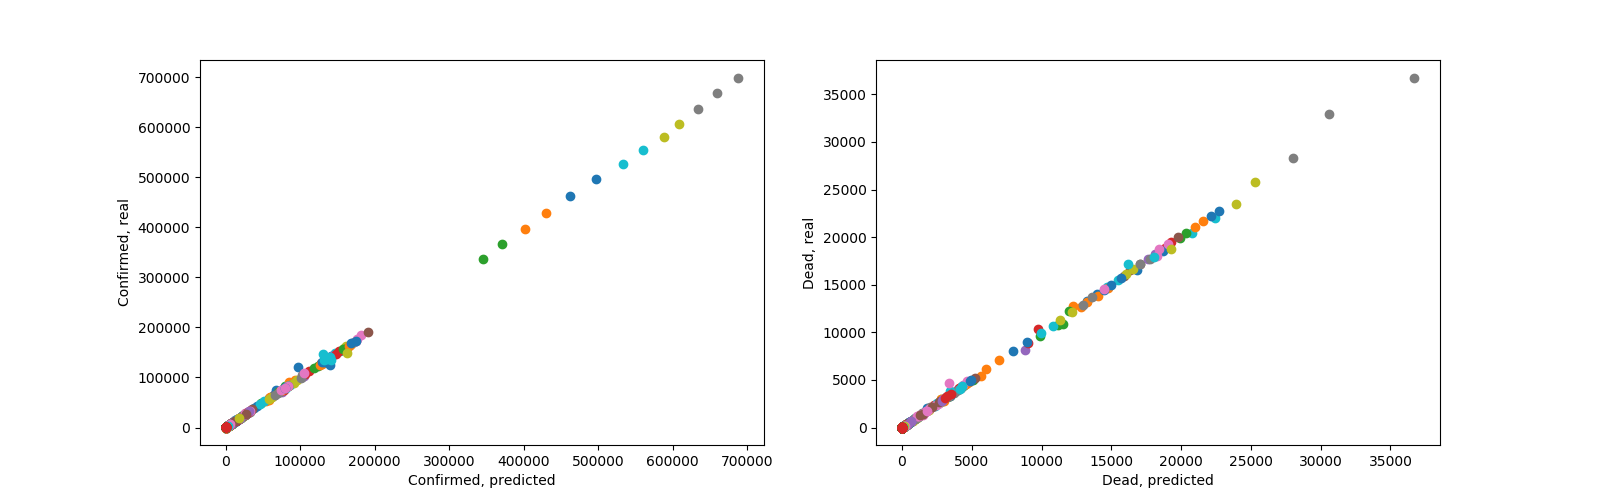

(15494, 24) (15494, 2) (3302, 24) (3302, 2) (3302, 2)
(254, 13) (254, 13)
(254, 13) (254, 13)
Average loss:  0.0446265112959094
By countries: count=254, mean=0.0446265112959094, std=0.018600833052313987, min=0.013386358035559324, max=0.10661956517583407


In [295]:
from sklearn import linear_model as L

cnt_batch_size = 1000

LATENCY = 12

H = 1 + (xConf.shape[0] - 1) // cnt_batch_size

fig, ax = plt.subplots(H, 2, figsize=(16, H * 5))

results = []

for i in range(0, xConf.shape[0], cnt_batch_size):
    j = min(i + cnt_batch_size, xConf.shape[0])
    k = i // cnt_batch_size
    train_X, train_Y, test_X, test_Y = create_dataset(xConf[i: j, :], xDead[i: j, :], latency=LATENCY, test_days=14)
    
    model = L.Ridge()
    
    model.fit(train_X, train_Y)
    pred_test_Y = model.predict(test_X)
    pred_test_Y[pred_test_Y < 0] = 0
    if (i%1230 == 0):
        print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape, pred_test_Y.shape)
    
    a1, b1 = pred_test_Y[:, 0].reshape(j - i, -1), test_Y[:, 0].reshape(j - i, -1)
    a2, b2 = pred_test_Y[:, 1].reshape(j - i, -1), test_Y[:, 1].reshape(j - i, -1)
    
    
    if (i%1230 == 0):
        print(a1.shape, b1.shape)
        print(a2.shape, b2.shape)
    
    if H > 1:
        ax1 = ax[k][0]
        ax2 = ax[k][1]
    else:
        ax1 = ax[0]
        ax2 = ax[1]
    
    for c in range(a1.shape[0]):
        ax1.plot(a1[c], b1[c], 'o', label=f'{CNT_NAMES[i + c]} conf')
        ax2.plot(a2[c], b2[c], 'o', label=f'{CNT_NAMES[i + c]} dead')

    ax1.set_xlabel('Confirmed, predicted')
    ax2.set_xlabel('Dead, predicted')
    ax1.set_ylabel('Confirmed, real')
    ax2.set_ylabel('Dead, real')
#     ax1.legend()
#     ax2.legend()
    print(f"Average loss: ", log_loss(pred_test_Y, test_Y))
    malec = 0.5*(log_loss(a1, b1, axis=1) + log_loss(a2, b2, axis=1))
    print(f"By countries: count={len(malec)}, mean={np.average(malec)}, std={malec.std()}, min={malec.min()}, max={malec.max()}")
    
    results.append((CNT_NAMES[i:j], model))

    None

<IPython.core.display.Javascript object>


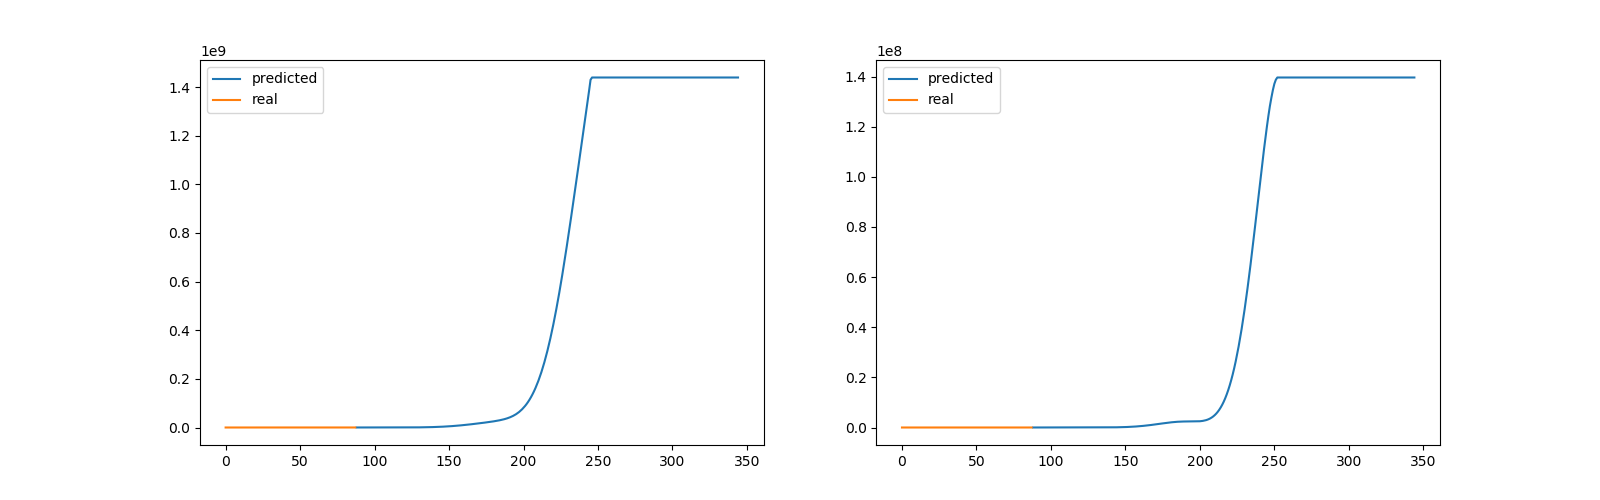

In [296]:
fwd_days = 257
dt = 0

real_days = xConf[idx].shape[0]
pred_start = real_days - dt
pred_end = pred_start + fwd_days

names, model = results[0]

topredConf, topredDead = xConf, xDead
if dt > 0:
    topredConf = topredConf[:, :-dt]
    topredDead = topredDead[:, :-dt]
rConf, rDead = create_prediction(model, topredConf, topredDead, latency=LATENCY, fwd_days=fwd_days, hide_neg=True, max_p=CNT_POPUL)

idx = cConf.index('China')
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].plot(range(pred_start, pred_end), rConf[idx, pred_start: pred_end], label=f'predicted')
ax[0].plot(range(real_days), xConf[idx], label=f'real')
ax[1].plot(range(pred_start, pred_end), rDead[idx, pred_start: pred_end], label=f'predicted')
ax[1].plot(range(real_days), xDead[idx], label=f'real')

ax[0].legend()
ax[1].legend()

In [297]:
l = []
for i, cnt_code in enumerate(ISO_CODES):
    for d in range(pred_start, pred_end):
        l.append(f"{datetime.strftime(min_datetime + timedelta(days=d), '%Y-%m-%d')},{cnt_code},{int(rConf[i, d])},{int(rDead[i, d])}")

f = open('results/apr19.csv', 'w')
f.write('date,region,prediction_confirmed,prediction_deaths\n')
for i in l:
    f.write(f'{i}\n')
f.close()